<a href="https://colab.research.google.com/github/SachinScaler/May25_Intro_to_ML_NN/blob/main/ML_Regularisation%2C_Cross_Validation%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets

data = datasets.load_diabetes()

X = data['data']

y = data['target']

X.shape, y.shape

((442, 10), (442,))

In [4]:
# train_test split
# scale

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import PolynomialFeatures

degree = 8

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly.shape, X_test_poly.shape


((353, 43758), (89, 43758))

In [6]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

X_train_poly_scaled.shape

(353, 43758)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_poly_scaled)

# train_mse
train_mse = mean_squared_error(y_train, model.predict(X_train_poly_scaled))
print("Train MSE", train_mse)


test_mse = mean_squared_error(y_test, y_pred)

print("MSE Test", test_mse)

Train MSE 2.3013764118255126e-24
MSE Test 89170.46499127561


In [9]:
train_r2 = r2_score(y_train, model.predict(X_train_poly_scaled))
test_r2 = r2_score(y_test, y_pred)

print("R2 Train", train_r2)
print("R2 Test", test_r2)

R2 Train 1.0
R2 Test -15.830485275594821


Regularization

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# lambda same as alpha: regularization strength
ridge_model = Ridge(alpha=0.1) # l2 reg
lasso_model = Lasso(alpha=0.1) # l1 reg
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)


# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)
elastic_model.fit(X_train_poly_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)
elastic_predictions = elastic_model.predict(X_test_poly_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.896e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


In [13]:
print("Original without reg", test_mse)
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))
print('test MSE for Elastic:', mean_squared_error(y_test, elastic_predictions))

Original without reg 89170.46499127561
test MSE for L1: 14094.572662536473
test MSE for L2: 85424.15027328652
test MSE for Elastic: 13952.82822816675


In [ ]:
# float('inf') or 9999999999

In [17]:
# lets generate a dataset of 100 points
import numpy as np

np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

X.shape

(1000, 1)

In [20]:
from sklearn.model_selection import train_test_split

# train and test
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_tr_cv.shape, X_test.shape

((800, 1), (200, 1))

In [22]:
# split_size to get 200 point in validation from train
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=1)
X_train.shape, X_val.shape

((600, 1), (200, 1))

In [25]:
import matplotlib.pyplot as plt


In [23]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

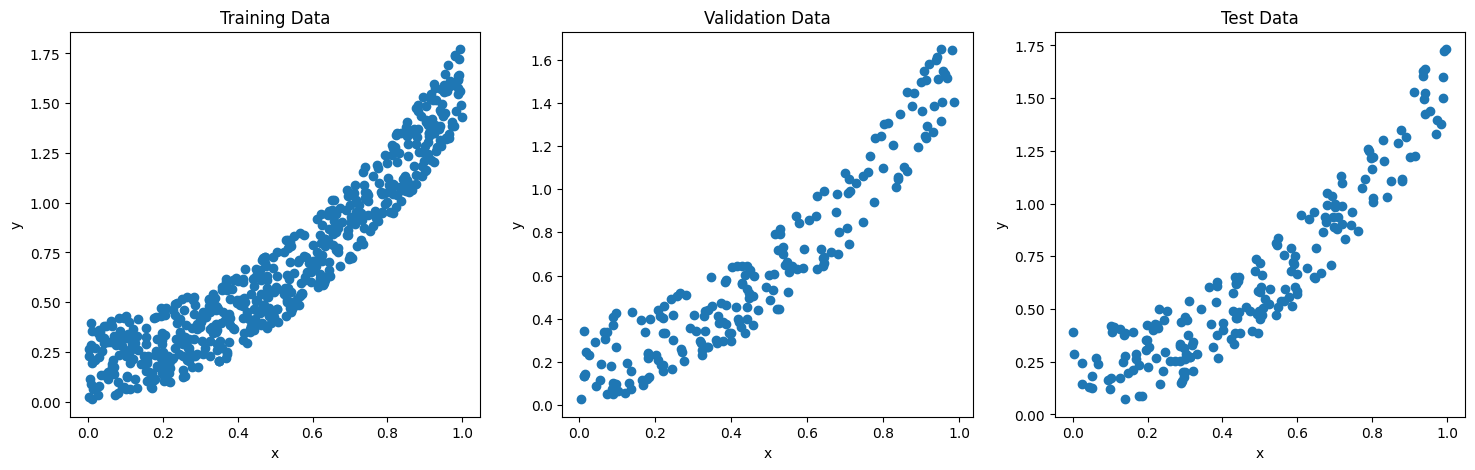

In [26]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])


## Polynomia Degree and Lambda

In [28]:
# import make_pipeline
from sklearn.pipeline import make_pipeline

# Same as we did earlier and in the last lecture
max_degree = 11 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    # transform to polynomial
    # scale feature
    # LR model to train

    # introducting make_pipeline
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree),
                          StandardScaler(),
                          LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    #
    train_score = r2_score(y_train, polyreg_scaled.predict(X_train))
    val_score = r2_score(y_val, polyreg_scaled.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

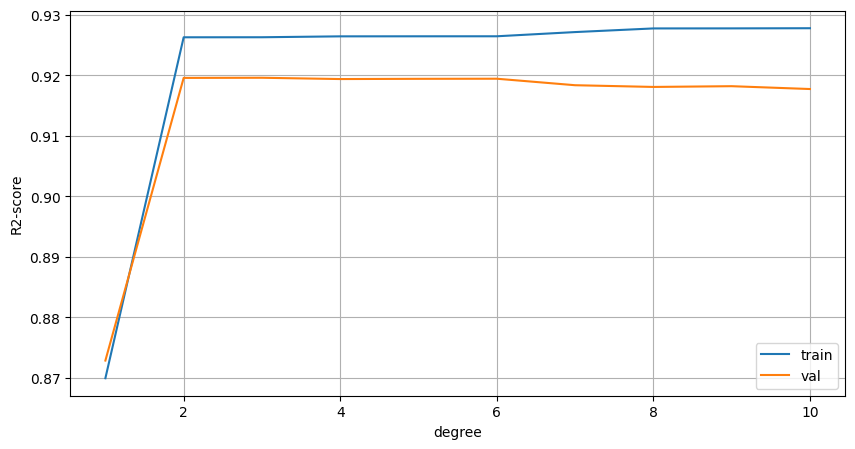

In [34]:
plt.figure(figsize = (10, 5))
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R2-score")
plt.grid()
plt.show()

In [36]:
# let's tune alpha
alphas = [0.01, 0.1, 0.39, 0.5, 1, 5, 10]
train_scores = []
val_scores = []

for alpha in alphas:
    polyreg_scaled = make_pipeline(PolynomialFeatures(2), # lets fix degree from our previous
                          StandardScaler(),
                          Ridge(alpha))
    polyreg_scaled.fit(X_train, y_train)

    #
    train_score = r2_score(y_train, polyreg_scaled.predict(X_train))
    val_score = r2_score(y_val, polyreg_scaled.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)


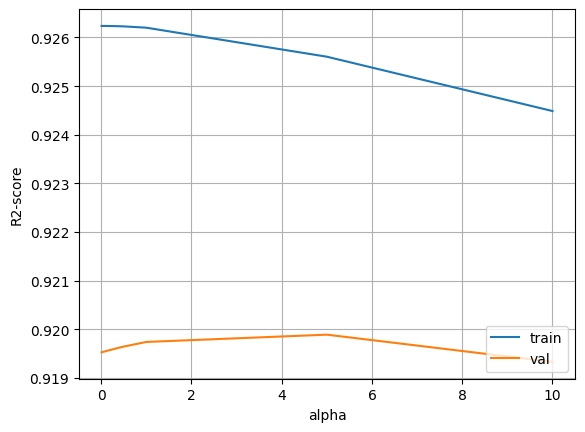

In [39]:
plt.figure()
plt.plot(alphas, train_scores, label="train")
plt.plot(alphas, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("alpha")
plt.ylabel("R2-score")
plt.grid()
plt.show()

In [41]:
degree = 2
alpha = 5

# metric eval: test set
polyreg_scaled = make_pipeline(PolynomialFeatures(degree),
                      StandardScaler(),
                      Ridge(alpha))
polyreg_scaled.fit(X_tr_cv, y_tr_cv)

# r2_score on test
test_score = r2_score(y_test, polyreg_scaled.predict(X_test))
print(test_score)

0.9137506642039778


In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[i for i in range(10)]}

ridge = Ridge()
clf = GridSearchCV(ridge, parameters)
clf.fit(X_tr_cv, y_tr_cv)
clf

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [50]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [51]:
clf.cv_results_['mean_test_score']

array([0.8697316 , 0.86950222, 0.86871895, 0.8674408 , 0.86572062,
       0.86360581, 0.86113895, 0.85835831, 0.85529831, 0.85198998])

In [52]:
clf.cv_results_['param_alpha']

masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=999999)